In [1]:
#Shruti notebook
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

#regression libraries


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/widsdatathon2022/train.csv
/kaggle/input/widsdatathon2022/test.csv
/kaggle/input/widsdatathon2022/sample_solution.csv


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
train = pd.read_csv("/kaggle/input/widsdatathon2022/train.csv")
test = pd.read_csv("/kaggle/input/widsdatathon2022/test.csv")
print("train set size", train.shape)
print("test set size", test.shape)

train set size (75757, 64)
test set size (9705, 63)


In [4]:
train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [5]:
test.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,37.0,2.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75757
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,1961.0,55.0,45.7,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75758
2,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,1950.0,1.0,59.1,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75759
3,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,1971.0,34.0,35.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75760
4,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,35.0,1.8,38,50.596774,...,0,29,5,2,0,340.0,330.0,22.8,126.0,75761


Data Preprocessing:

1. find null values
2. impute missing values

#seeing the column names

Text(0.5, 1.0, 'Missing values in test data')

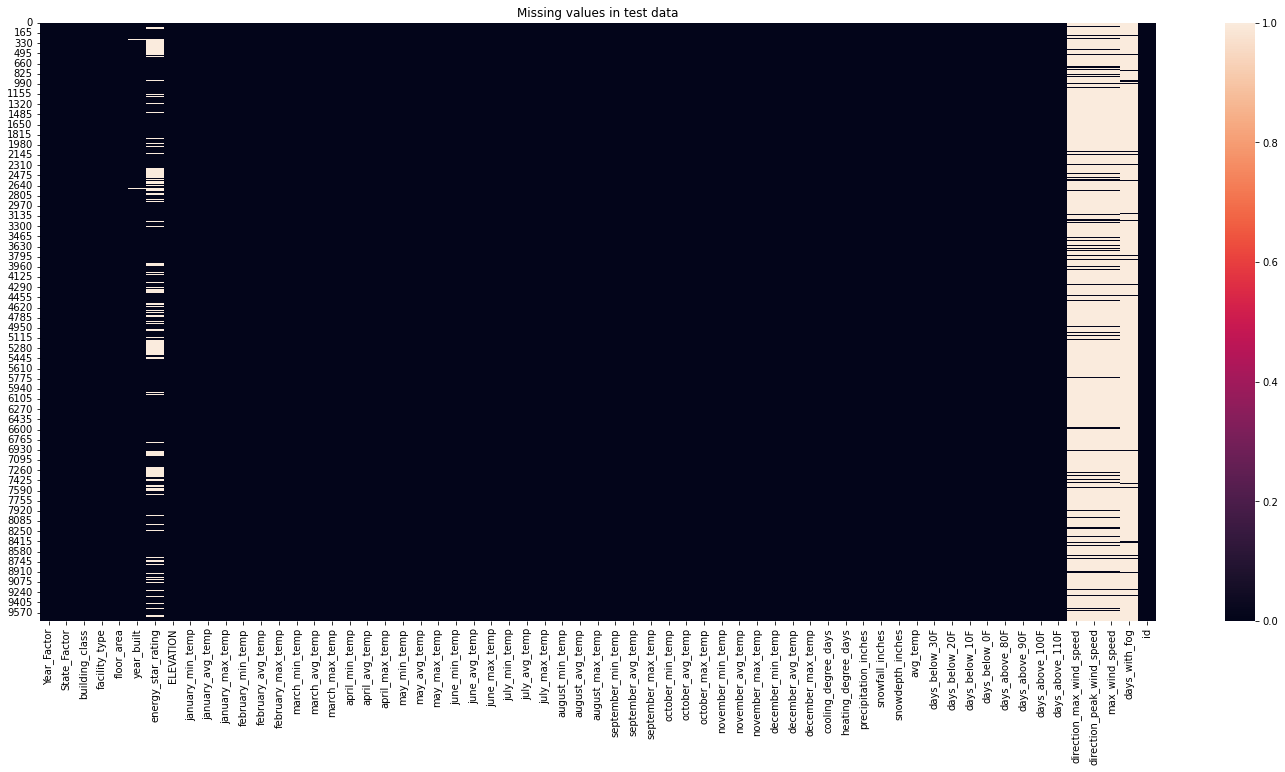

In [6]:
plt.figure(figsize=(25,11))
sns.heatmap(test.isna(),xticklabels = test.columns)
plt.title("Missing values in test data")

Checking columns one by one

In [7]:
#energy star rating
print("total null values of energy_star_rating is: ", train["energy_star_rating"].isna().sum())
print("type of train energy_star_rating", train["energy_star_rating"].dtype)

#the data is in float so we can impute data 
train["energy_star_rating"].fillna(train["energy_star_rating"].mean(), inplace = True)
print("\nafter imputation \ntotal null values of energy_star_rating is: ", train["energy_star_rating"].isna().sum())
print("\n\n")

#year_built
print("total null values of energy_star_rating is: ", train["year_built"].isna().sum())
print("type of train energy_star_rating", train["year_built"].dtype)

#the data is in float so we can impute data 
train["year_built"].fillna(train["year_built"].mean(), inplace = True)
print("\nafter imputation \ntotal null values of year_built is: ", train["year_built"].isna().sum())
print("\n\n")

#direction_max_wind_speed
print("total null values of direction_max_wind_speed is: ", train["direction_max_wind_speed"].isna().sum())
print("type of train direction_max_wind_speed", train["direction_max_wind_speed"].dtype)
#the data is in float so we can impute data 
train["direction_max_wind_speed"].fillna(train["direction_max_wind_speed"].mean(), inplace = True)
print("\nafter imputation \ntotal null values of direction_max_wind_speed is: ", train["direction_max_wind_speed"].isna().sum())
print("\n\n")

#max_wind_speed
print("total null values of max_wind_speed is: ", train["max_wind_speed"].isna().sum())
print("type of train max_wind_speed", train["max_wind_speed"].dtype)
#the data is in float so we can impute data 
train["max_wind_speed"].fillna(train["max_wind_speed"].mean(), inplace = True)
print("\nafter imputation \ntotal null values of max_wind_speed is: ", train["max_wind_speed"].isna().sum())
print("\n\n")

#direction_peak_wind_speed
print("total null values of direction_peak_wind_speed is: ", train["direction_peak_wind_speed"].isna().sum())
print("type of train direction_peak_wind_speed", train["direction_peak_wind_speed"].dtype)
#the data is in float so we can impute data 
train["direction_peak_wind_speed"].fillna(train["direction_peak_wind_speed"].mean(), inplace = True)
print("\nafter imputation \ntotal null values of direction_peak_wind_speed is: ", train["direction_peak_wind_speed"].isna().sum())
print("\n\n")

#days_with_fog
print("total null values of days_with_fog is: ", train["days_with_fog"].isna().sum())
print("type of train days_with_fog", train["days_with_fog"].dtype)
#the data is in float so we can impute data 
train["days_with_fog"].fillna(train["days_with_fog"].mean(), inplace = True)
print("\nafter imputation \ntotal null values of days_with_fog is: ", train["days_with_fog"].isna().sum())
print("\n\n")

#direction_max_wind_speed
print("total null values of direction_max_wind_speed is: ", test["direction_max_wind_speed"].isna().sum())
print("type of train direction_max_wind_speed", test["direction_max_wind_speed"].dtype)

#the data is in float so we can impute data 
test["direction_max_wind_speed"].fillna(test["direction_max_wind_speed"].mean(), inplace = True)
print("\nafter imputation \ntotal null values of direction_max_wind_speed is: ", test["direction_max_wind_speed"].isna().sum())
print("\n\n")

##for test

print("total null values of energy_star_rating is: ", test["energy_star_rating"].isna().sum())
print("type of train energy_star_rating", test["energy_star_rating"].dtype)

#the data is in float so we can impute data 
test["energy_star_rating"].fillna(test["energy_star_rating"].mean(), inplace = True)
print("\nafter imputation \ntotal null values of energy_star_rating is: ", test["energy_star_rating"].isna().sum())
print("\n\n")

#year_built
print("total null values of year_built is: ", test["year_built"].isna().sum())
print("type of test year_built", test["year_built"].dtype)



#the data is in float so we can impute data 
test["year_built"].fillna(test["year_built"].mean(), inplace = True)
print("\nafter imputation \ntotal null values of year_built is: ", test["year_built"].isna().sum())
print("\n\n")

#direction_peak_wind_speed
print("total null values of direction_peak_wind_speed is: ", test["direction_peak_wind_speed"].isna().sum())
print("type of test direction_peak_wind_speed", test["direction_peak_wind_speed"].dtype)

#the data is in float so we can impute data 
test["direction_peak_wind_speed"].fillna(test["direction_peak_wind_speed"].mean(), inplace = True)
print("\nafter imputation \ntotal null values of direction_peak_wind_speed is: ", test["direction_peak_wind_speed"].isna().sum())
print("\n\n")

#max_wind_speed
print("total null values of max_wind_speed is: ", test["max_wind_speed"].isna().sum())
print("type of test max_wind_speed", test["max_wind_speed"].dtype)

#the data is in float so we can impute data 
test["max_wind_speed"].fillna(test["max_wind_speed"].mean(), inplace = True)
print("\nafter imputation \ntotal null values of max_wind_speed is: ", test["max_wind_speed"].isna().sum())
print("\n\n")

#days_with_fog
print("total null values of days_with_fog is: ", test["days_with_fog"].isna().sum())
print("type of test days_with_fog", test["days_with_fog"].dtype)

#the data is in float so we can impute data 
test["days_with_fog"].fillna(test["days_with_fog"].mean(), inplace = True)
print("\nafter imputation \ntotal null values of days_with_fog is: ", test["days_with_fog"].isna().sum())
print("\n\n")



total null values of energy_star_rating is:  26709
type of train energy_star_rating float64

after imputation 
total null values of energy_star_rating is:  0



total null values of energy_star_rating is:  1837
type of train energy_star_rating float64

after imputation 
total null values of year_built is:  0



total null values of direction_max_wind_speed is:  41082
type of train direction_max_wind_speed float64

after imputation 
total null values of direction_max_wind_speed is:  0



total null values of max_wind_speed is:  41082
type of train max_wind_speed float64

after imputation 
total null values of max_wind_speed is:  0



total null values of direction_peak_wind_speed is:  41811
type of train direction_peak_wind_speed float64

after imputation 
total null values of direction_peak_wind_speed is:  0



total null values of days_with_fog is:  45796
type of train days_with_fog float64

after imputation 
total null values of days_with_fog is:  0



total null values of direction_

plotting heatmap after imputation

Text(0.5, 1.0, 'Missing values in training data')

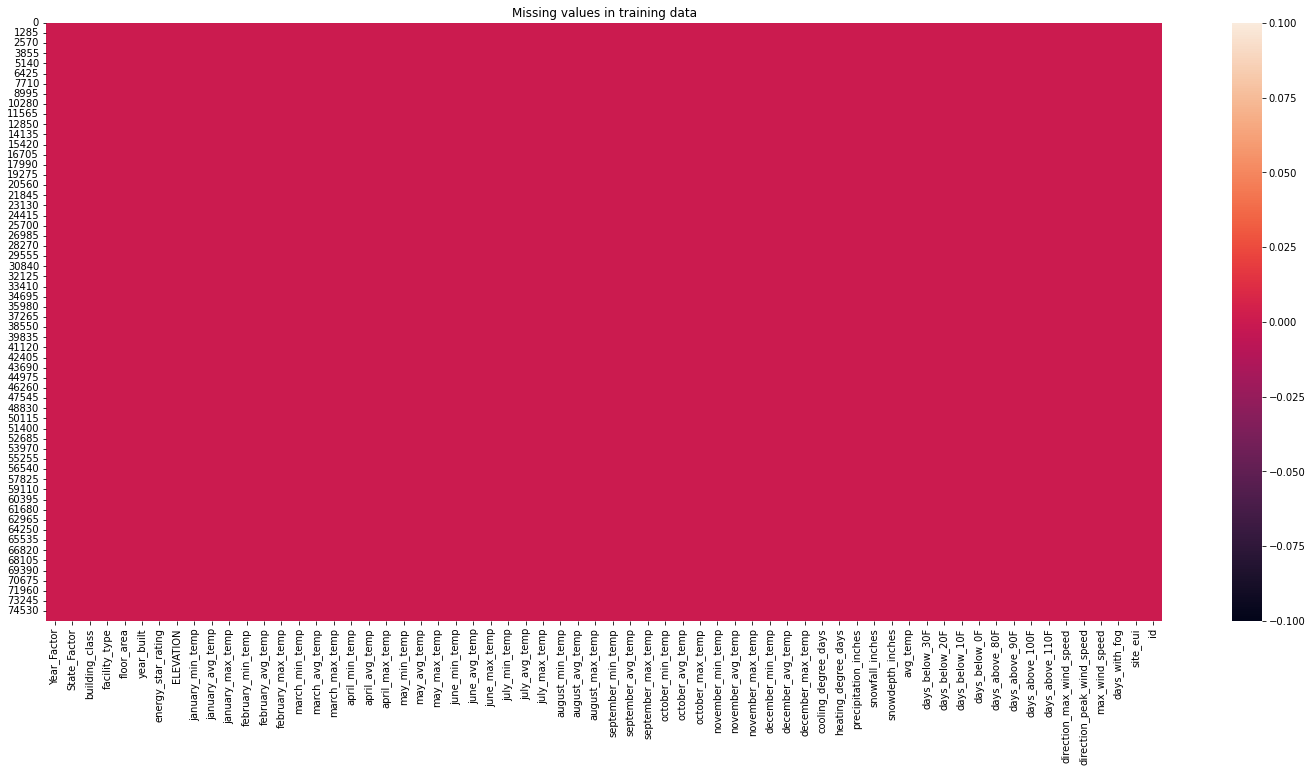

In [8]:
plt.figure(figsize=(25,11))
sns.heatmap(train.isna(), xticklabels = train.columns)
plt.title("Missing values in training data")

Text(0.5, 1.0, 'Missing values in test data')

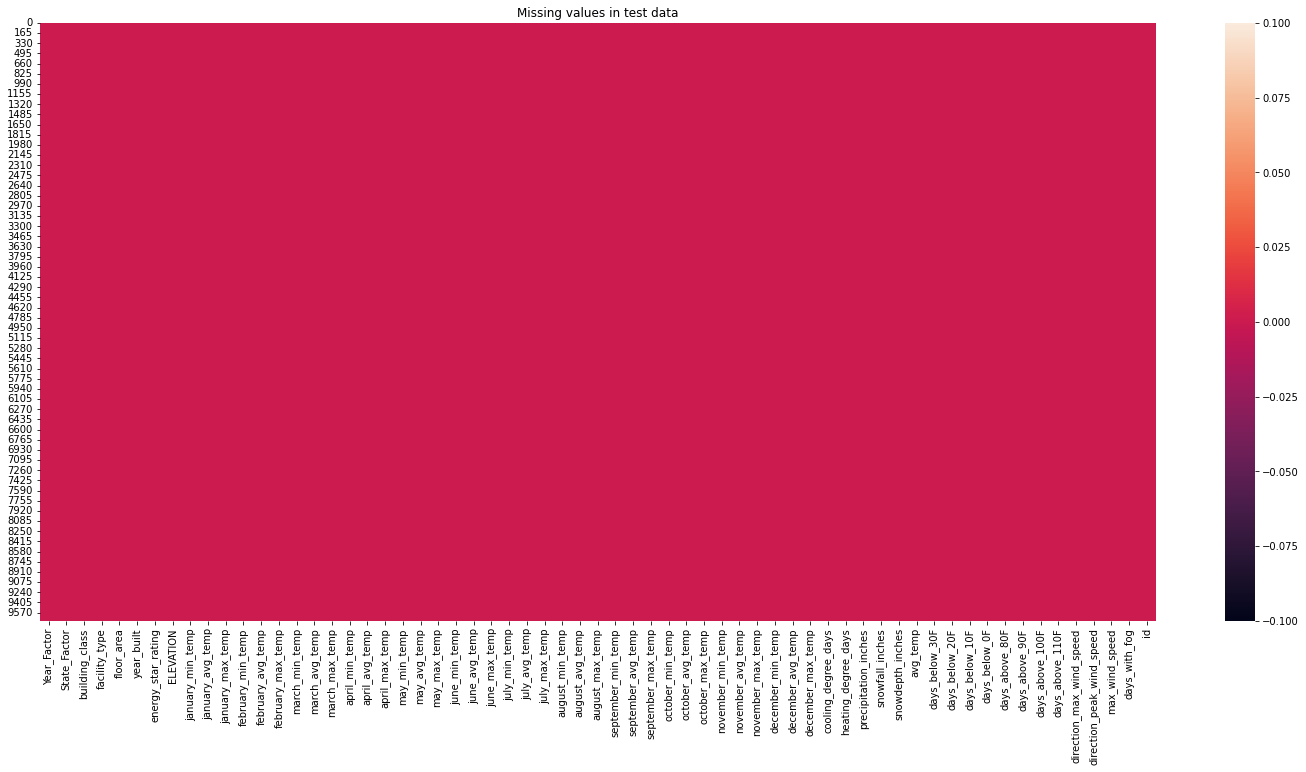

In [9]:
plt.figure(figsize=(25,11))
sns.heatmap(test.isna(), xticklabels = test.columns)
plt.title("Missing values in test data")

Seperating numerical and categorical data for preprocessing

In [10]:
numerical_feature = []
categorical_feature = []
train_columns = train.columns
print("total train data",train.shape)

for col in train_columns:
    if train[col].dtype=='int64' or train[col].dtype=='float64':
        numerical_feature.append(col)
    else:
        categorical_feature.append(col)
print("\nlength of numerical features",len(numerical_feature),"\n\n", "numerical features",numerical_feature , "\n\n\n\n")
print("\nlength of categorical feature",len(categorical_feature),"\n\n", "categorical features",categorical_feature ,"\n\n\n\n")

total train data (75757, 64)

length of numerical features 61 

 numerical features ['Year_Factor', 'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION', 'january_min_temp', 'january_avg_temp', 'january_max_temp', 'february_min_temp', 'february_avg_temp', 'february_max_temp', 'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp', 'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp', 'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp', 'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp', 'august_avg_temp', 'august_max_temp', 'september_min_temp', 'september_avg_temp', 'september_max_temp', 'october_min_temp', 'october_avg_temp', 'october_max_temp', 'november_min_temp', 'november_avg_temp', 'november_max_temp', 'december_min_temp', 'december_avg_temp', 'december_max_temp', 'cooling_degree_days', 'heating_degree_days', 'precipitation_inches', 'snowfall_inches', 'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_be

***Working with categorical data***

categorical feature plots

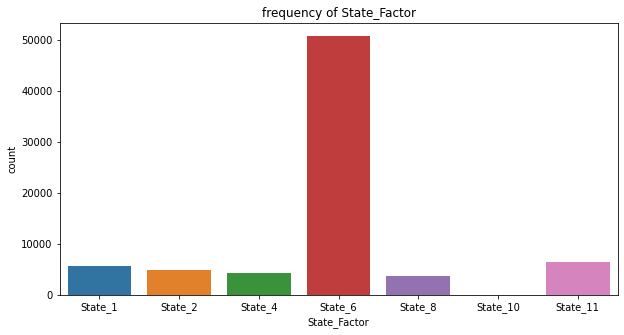

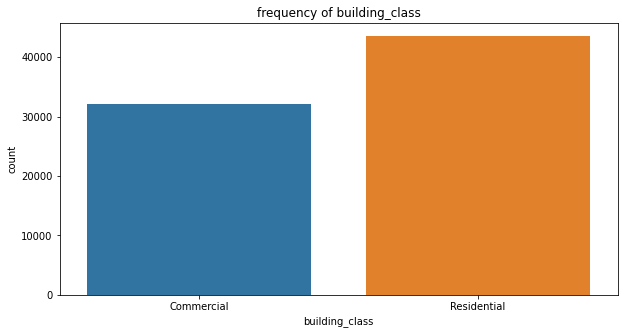

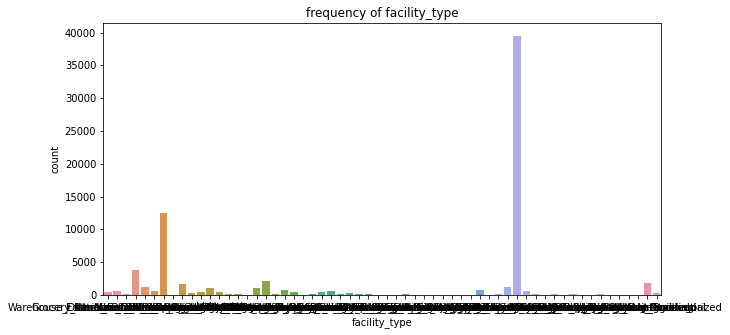

In [11]:
for feature in categorical_feature:
    plt.figure(figsize=(10,5))
    sns.countplot(train[feature])
    plt.title("frequency of "+feature)
    plt.show()

Label encoding the categorical features

In [12]:
label_encoder = LabelEncoder()
train['State_Factor'] = label_encoder.fit_transform(train['State_Factor']).astype("uint8")
test['State_Factor'] = label_encoder.fit_transform(test['State_Factor']).astype("uint8")

train['building_class'] = label_encoder.fit_transform(train['building_class']).astype("uint8")
test['building_class'] = label_encoder.fit_transform(test['building_class']).astype("uint8")

train['facility_type'] = label_encoder.fit_transform(train['facility_type']).astype("uint8")
test['facility_type'] = label_encoder.fit_transform(test['facility_type']).astype("uint8")

In [13]:
print("State_Factor",np.unique(train['State_Factor']))
print("building_class",np.unique(train['building_class']))
print("facility_type",np.unique(train['facility_type']))

State_Factor [0 1 2 3 4 5 6]
building_class [0 1]
facility_type [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]


Range Normalization

In [14]:
for column in train:
    print(column, "--"*20,"min", np.min(train[column]), "    max",np.max(train[column]))

Year_Factor ---------------------------------------- min 1     max 6
State_Factor ---------------------------------------- min 0     max 6
building_class ---------------------------------------- min 0     max 1
facility_type ---------------------------------------- min 0     max 59
floor_area ---------------------------------------- min 943.0     max 6385382.0
year_built ---------------------------------------- min 0.0     max 2015.0
energy_star_rating ---------------------------------------- min 0.0     max 100.0
ELEVATION ---------------------------------------- min -6.4     max 1924.5
january_min_temp ---------------------------------------- min -19     max 49
january_avg_temp ---------------------------------------- min 10.80645161     max 64.75806452
january_max_temp ---------------------------------------- min 42     max 91
february_min_temp ---------------------------------------- min -13     max 48
february_avg_temp ---------------------------------------- min 13.25     max 65.

Scaling

In [15]:
# scaler = StandardScaler()
# trained_scaled_data = scaler.fit_transform(train)
# train = pd.DataFrame(trained_scaled_data, index=train.index, columns=train.columns)

# scaler = StandardScaler()
# test_scaled_data = scaler.fit_transform(test)
# test = pd.DataFrame(test_scaled_data, index=test.index, columns=test.columns)

from sklearn.preprocessing import MinMaxScaler

train_scaler = MinMaxScaler()
train_scaler.fit(train)
train_scaled = train_scaler.transform(train)

test_scaler = MinMaxScaler()
test_scaler.fit(test)
test_scaled = test_scaler.transform(test)


In [16]:
train = pd.DataFrame(train_scaled, index=train.index, columns=train.columns)
test = pd.DataFrame(test_scaled, index=test.index, columns=test.columns)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)
from sklearn.metrics import mean_squared_error

In [18]:
y_train = train["site_eui"]
train.drop(["site_eui"], axis=1, inplace=True)
X_train = train

In [19]:
X_train.shape, test.shape

((75757, 63), (9705, 63))

after normalizing

In [20]:
X_train

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,0.0,0.000000,0.0,0.220339,0.009445,0.963772,0.110000,0.004557,0.808824,0.735725,...,0.0,0.053846,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.32489,0.000000
1,0.0,0.000000,0.0,0.932203,0.042769,0.970223,0.450000,0.004247,0.808824,0.735725,...,0.0,0.053846,0.000000,0.0,0.0,0.000000,0.172089,0.000000,0.00000,0.000013
2,0.0,0.000000,0.0,0.813559,0.043713,0.968238,0.970000,0.004247,0.808824,0.735725,...,0.0,0.053846,0.000000,0.0,0.0,0.000000,0.172089,0.000000,0.00000,0.000026
3,0.0,0.000000,0.0,0.101695,0.008518,0.982630,0.460000,0.004247,0.808824,0.735725,...,0.0,0.053846,0.000000,0.0,0.0,0.000000,0.172089,0.000000,0.00000,0.000040
4,0.0,0.000000,0.0,0.949153,0.010190,0.985112,1.000000,0.004557,0.808824,0.735725,...,0.0,0.053846,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.32489,0.000053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,1.0,0.333333,0.0,0.542373,0.003049,0.990074,0.080000,0.022269,0.691176,0.605082,...,0.0,0.096154,0.016216,0.0,0.0,0.182598,0.172089,0.143076,0.32489,0.999947
75753,1.0,0.333333,1.0,0.016949,0.006194,0.947891,0.980000,0.022269,0.691176,0.605082,...,0.0,0.096154,0.016216,0.0,0.0,0.182598,0.172089,0.143076,0.32489,0.999960
75754,1.0,0.333333,0.0,0.033898,0.004249,0.951365,0.610486,0.022269,0.661765,0.478326,...,0.0,0.023077,0.000000,0.0,0.0,0.182598,0.172089,0.143076,0.32489,0.999974
75755,1.0,0.333333,0.0,0.033898,0.008244,0.998511,0.610486,0.022269,0.661765,0.478326,...,0.0,0.023077,0.000000,0.0,0.0,0.182598,0.172089,0.143076,0.32489,0.999987


In [21]:
# some regression algorithms Linear Regression', 'K nearest Regressor', 'DecisionTreeRegressor','RandomForestRegressor','Gradient Boosting Regressor', 'AdaBoosting Regressor']

model = RandomForestRegressor()
model.fit(X_train, y_train)
output = model.predict(test)


In [22]:
output

# output_scaled= scaler.inverse_transform(output).reshape(-1,1)

array([0.29803759, 0.23816241, 0.29015085, ..., 0.11761467, 0.04720753,
       0.05907675])

In [23]:
output.shape

(9705,)

In [24]:
dfoutput = pd.DataFrame(output)

In [25]:
dfoutput.shape

(9705, 1)

In [26]:
denormalized_output = (output*(997.8661202 - 1.001169302)) + 1.001169302


In [27]:
denormalized_output

array([298.10439911, 238.41692437, 290.24237721, ..., 118.24711294,
        48.06070609,  59.89271011])

In [28]:
sub = pd.read_csv("../input/widsdatathon2022/sample_solution.csv")
sub

,id,site_eui
0,75757,0.0
1,75758,0.0
2,75759,0.0
3,75760,0.0
4,75761,0.0
...,...,...
9700,85457,0.0
9701,85458,0.0
9702,85459,0.0
9703,85460,0.0


In [29]:
sub["site_eui"] = denormalized_output
sub


,id,site_eui
0,75757,298.104399
1,75758,238.416924
2,75759,290.242377
3,75760,274.350345
4,75761,273.145257
...,...,...
9700,85457,112.644854
9701,85458,106.904084
9702,85459,118.247113
9703,85460,48.060706


In [30]:
sub.to_csv("submission.csv", index=False)

In [31]:
#things you can do:
# 1. finding corelation
# 2. visualizing through different 
# 2. Principle component Analysis:  https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html 
# 2. outlier detection
